In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sim_df = pd.read_csv("gri_matches/new_gri_matches_full.csv")

In [2]:
sim_df.head()

,Unnamed: 0,organization,industry,section,gri_idx,sim_score,gri_desc
0,0,lloyds,finances,lloyds-sustainability-2023-1,gri_2-22,0.630972,General Disclosures (Organization and its Repo...
1,1,lloyds,finances,lloyds-sustainability-2023-1,gri_2-2,0.615845,General Disclosures (Organization and its Repo...
2,2,lloyds,finances,lloyds-sustainability-2023-1,gri_2-27,0.505001,General Disclosures (Organization and its Repo...
3,3,lloyds,finances,lloyds-sustainability-2023-1,gri_2-24,0.483464,General Disclosures (Organization and its Repo...
4,4,lloyds,finances,lloyds-sustainability-2023-1,gri_201-2,0.478438,"Economic Performance (Revenue, Financial risks..."


### Industry-wise analysis

In [3]:
gri_counts = sim_df.groupby(['industry', 'organization', 'gri_idx']).size().reset_index(name='count')

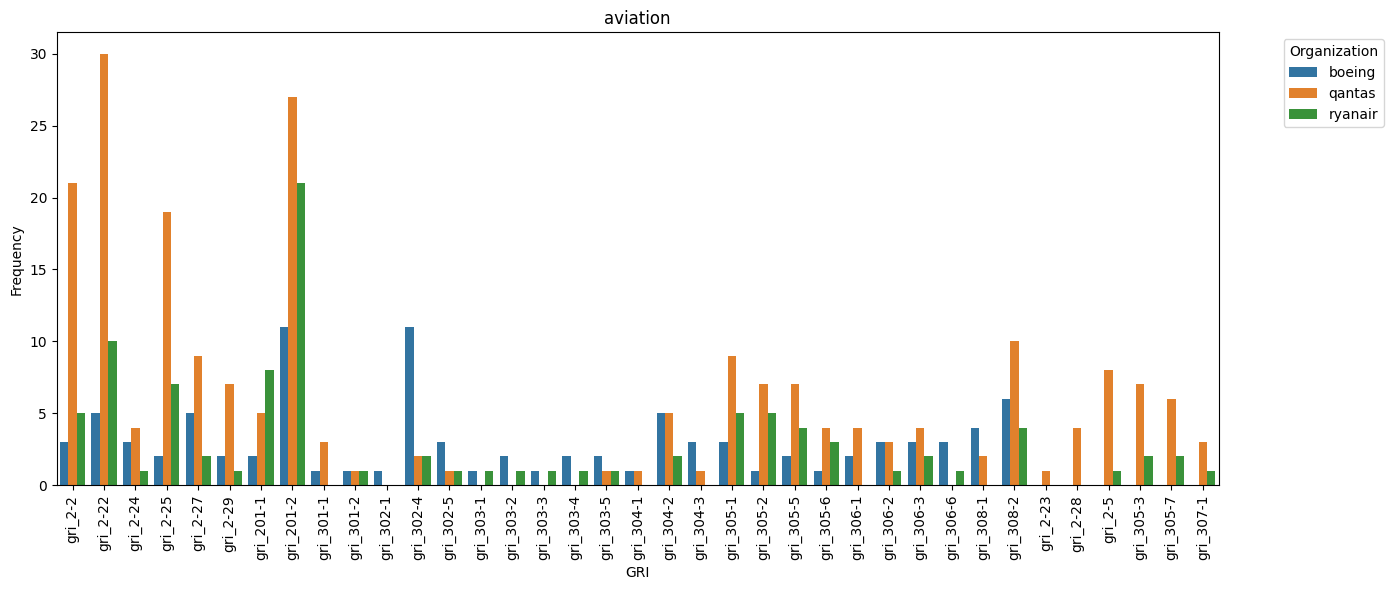

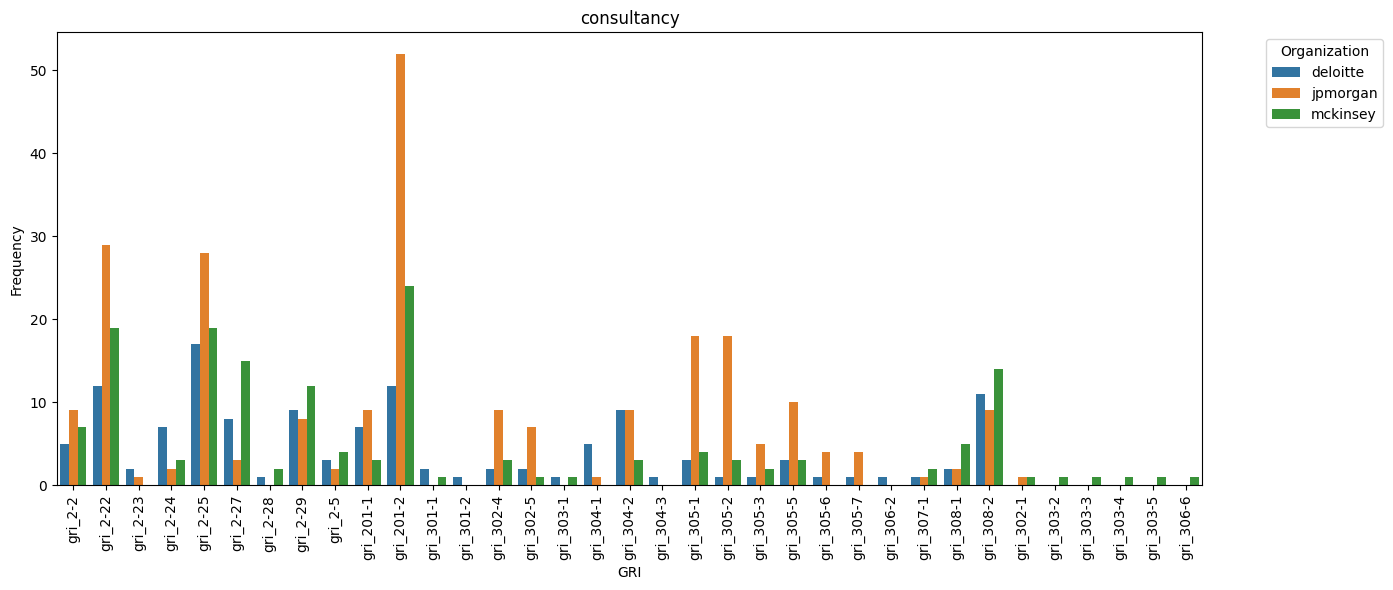

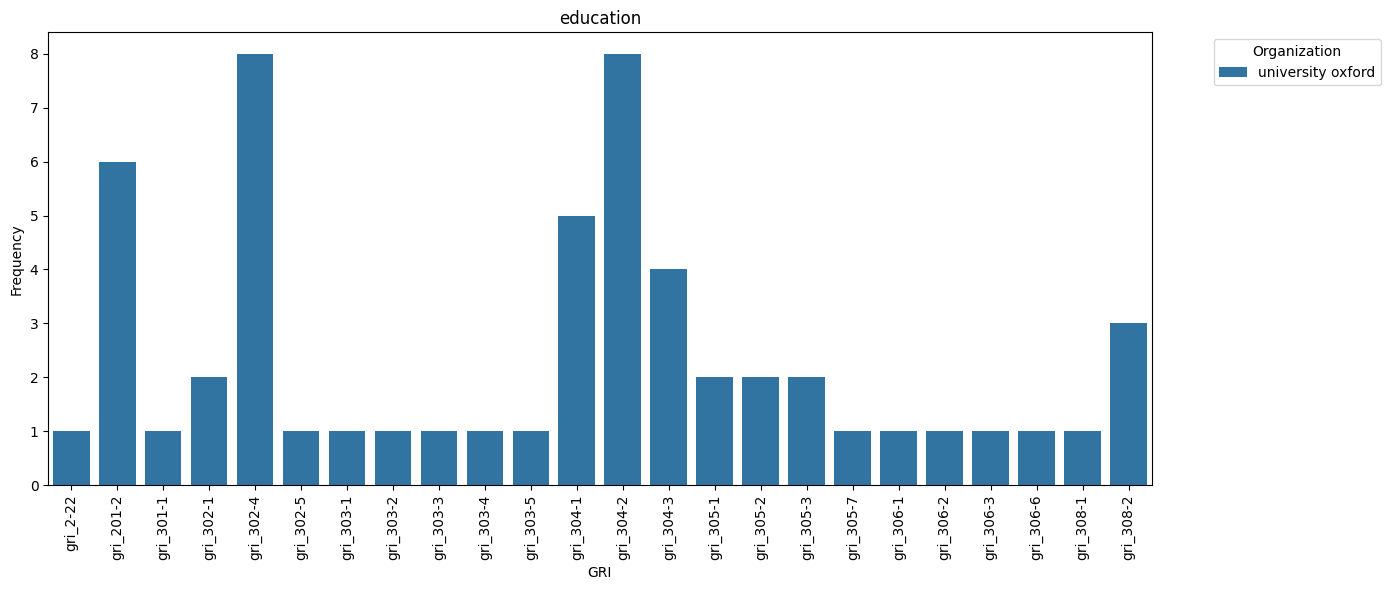

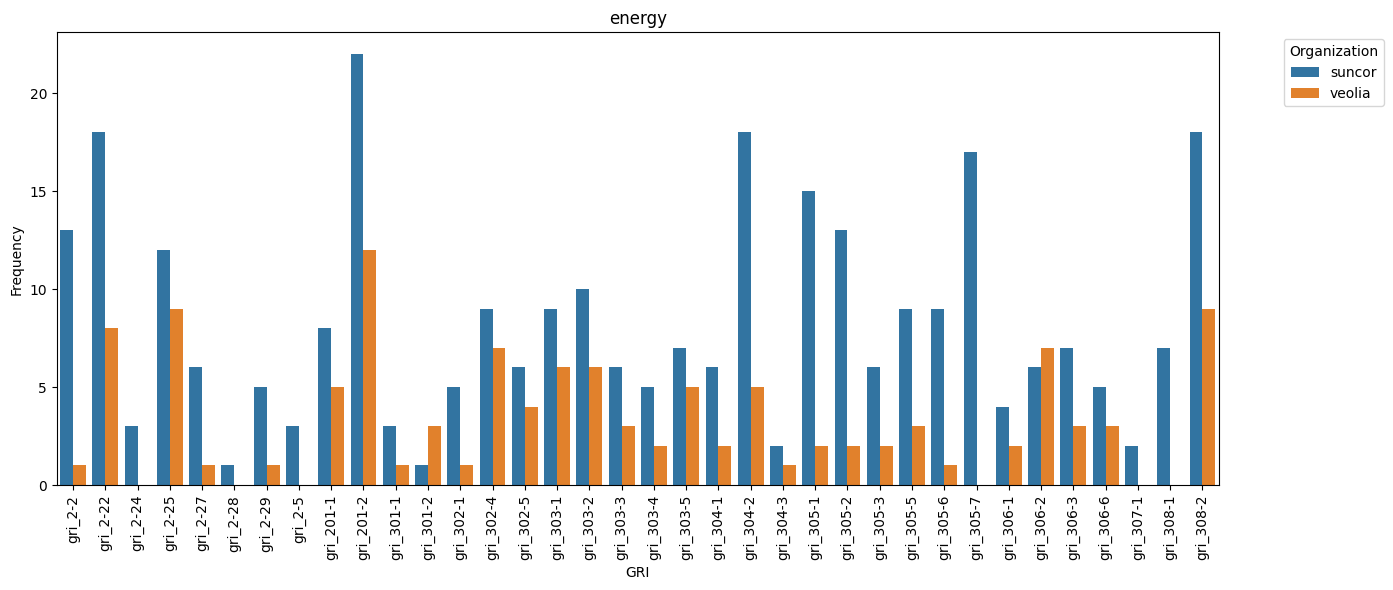

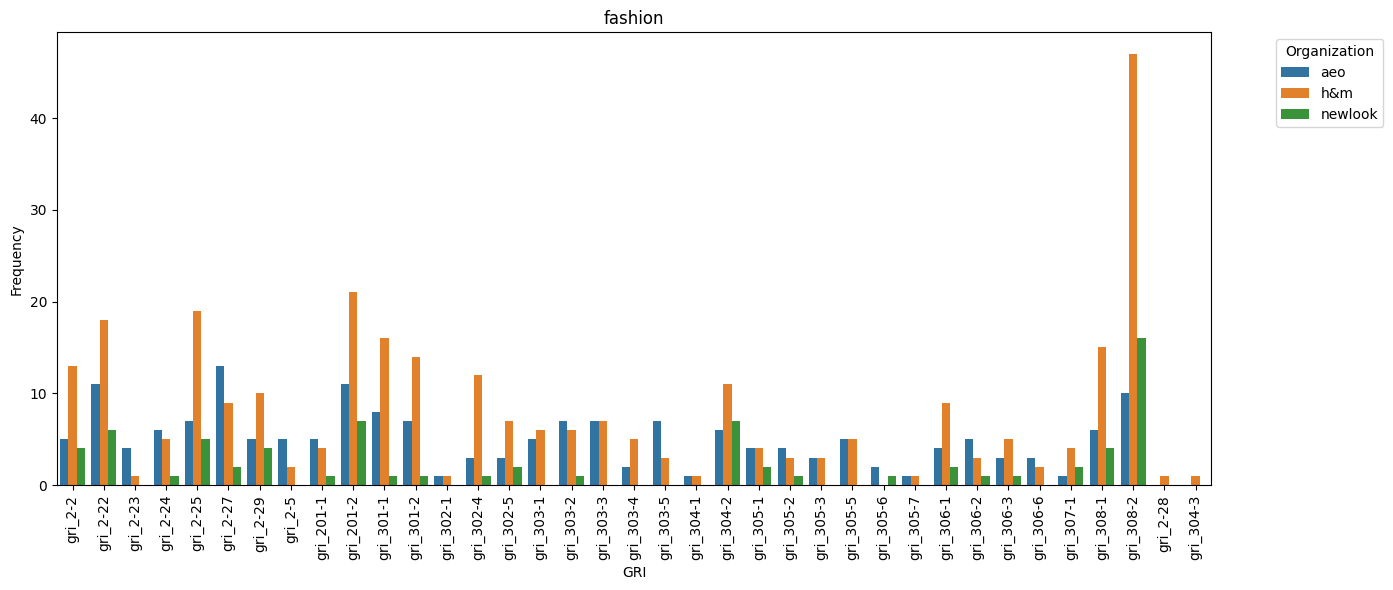

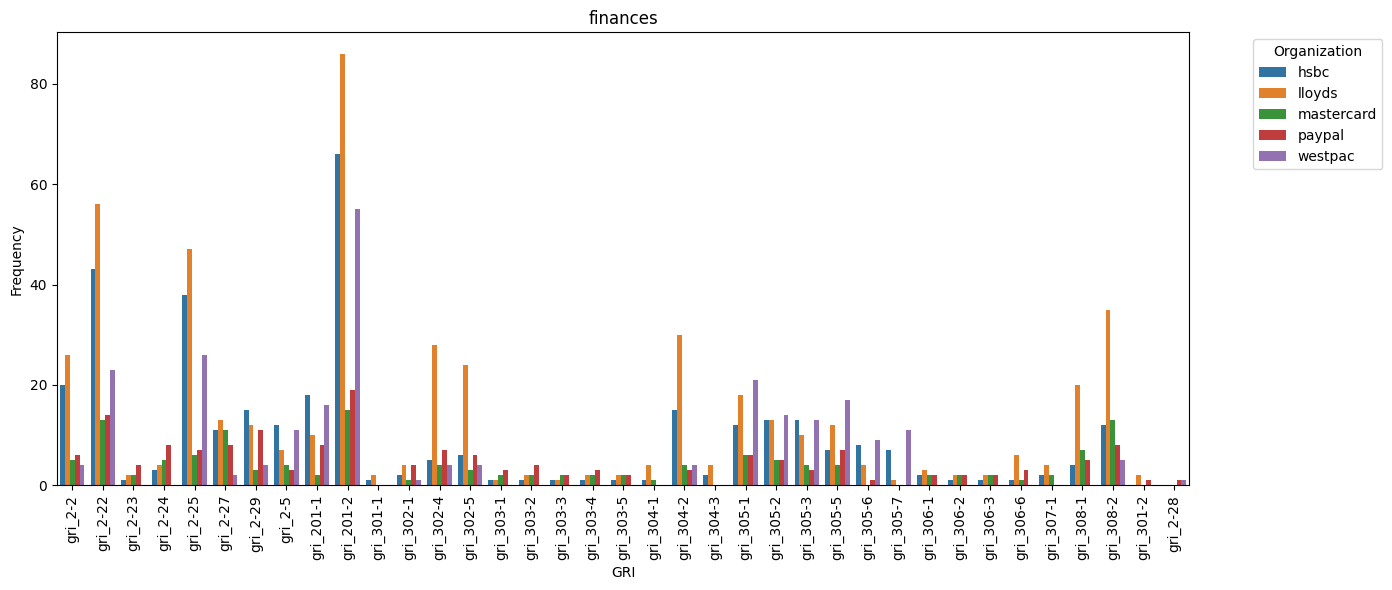

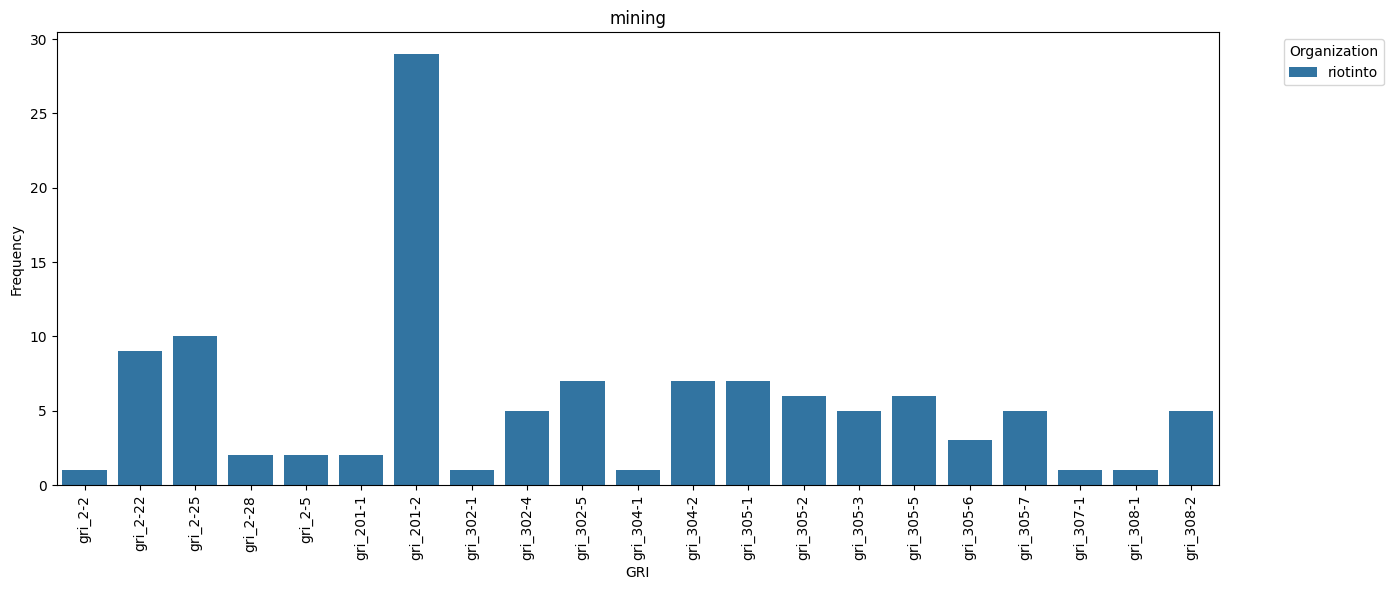

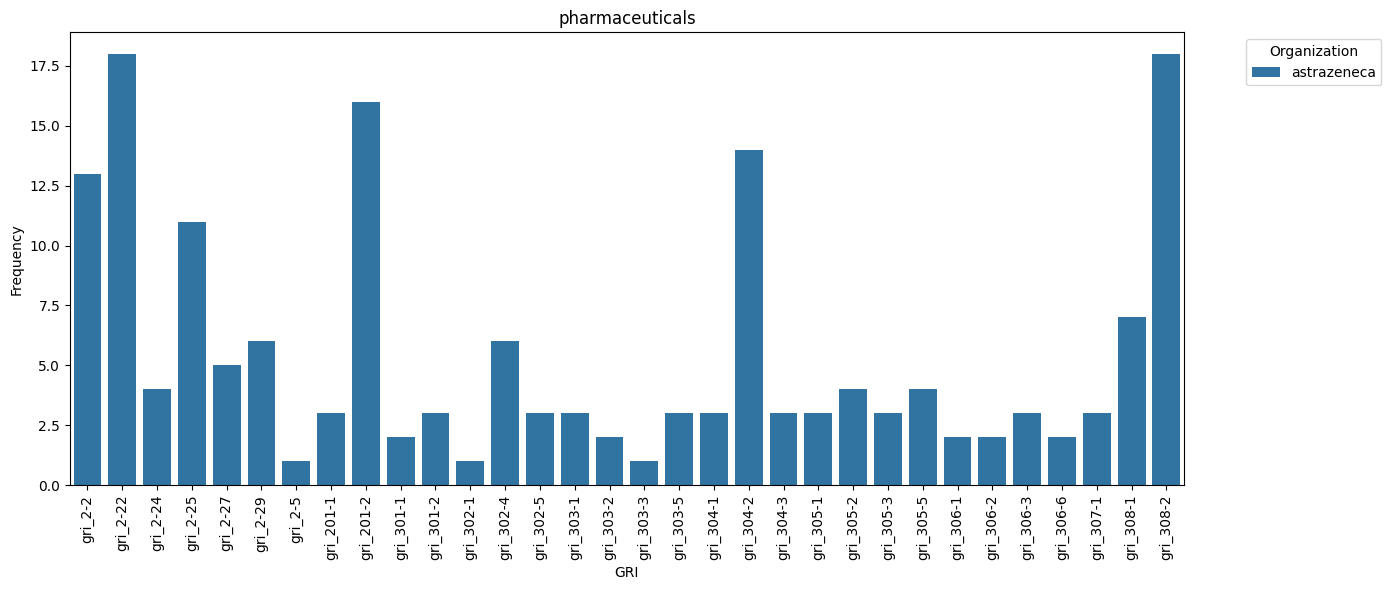

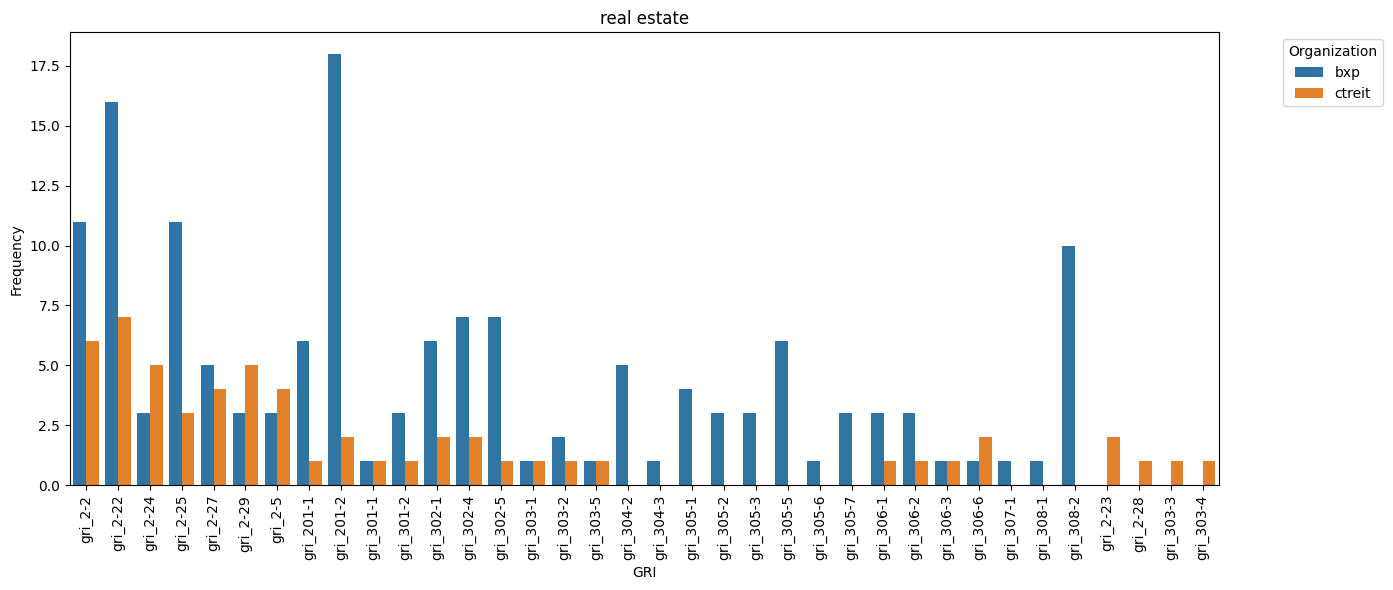

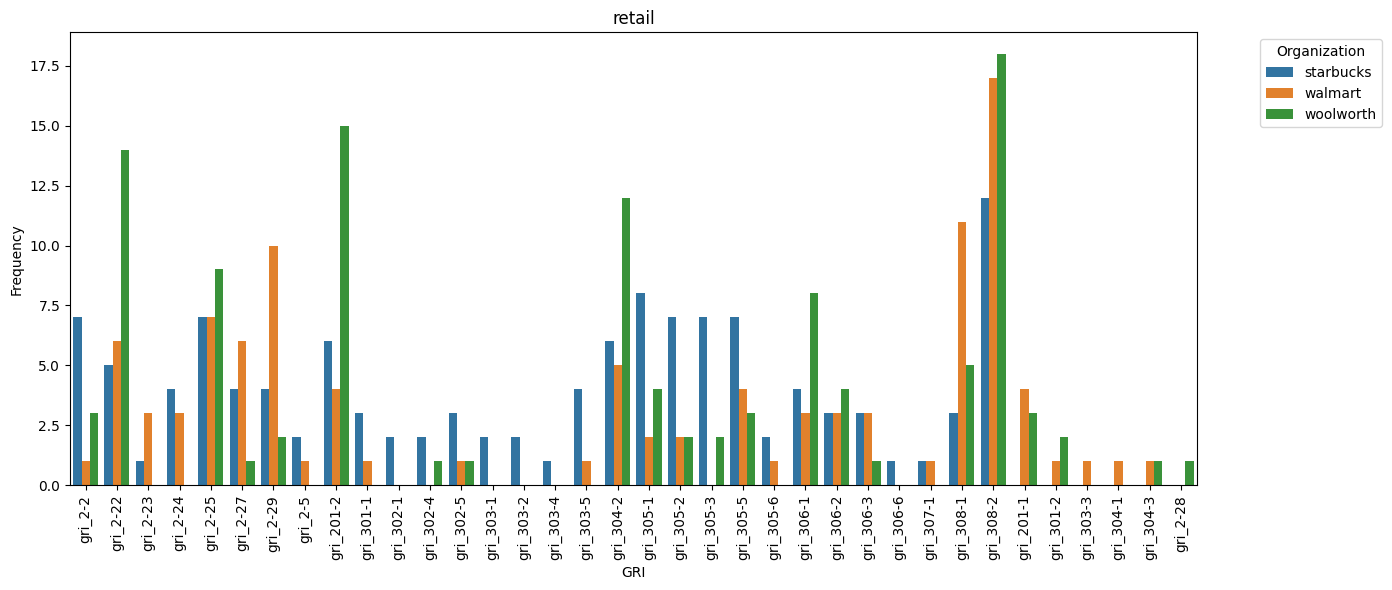

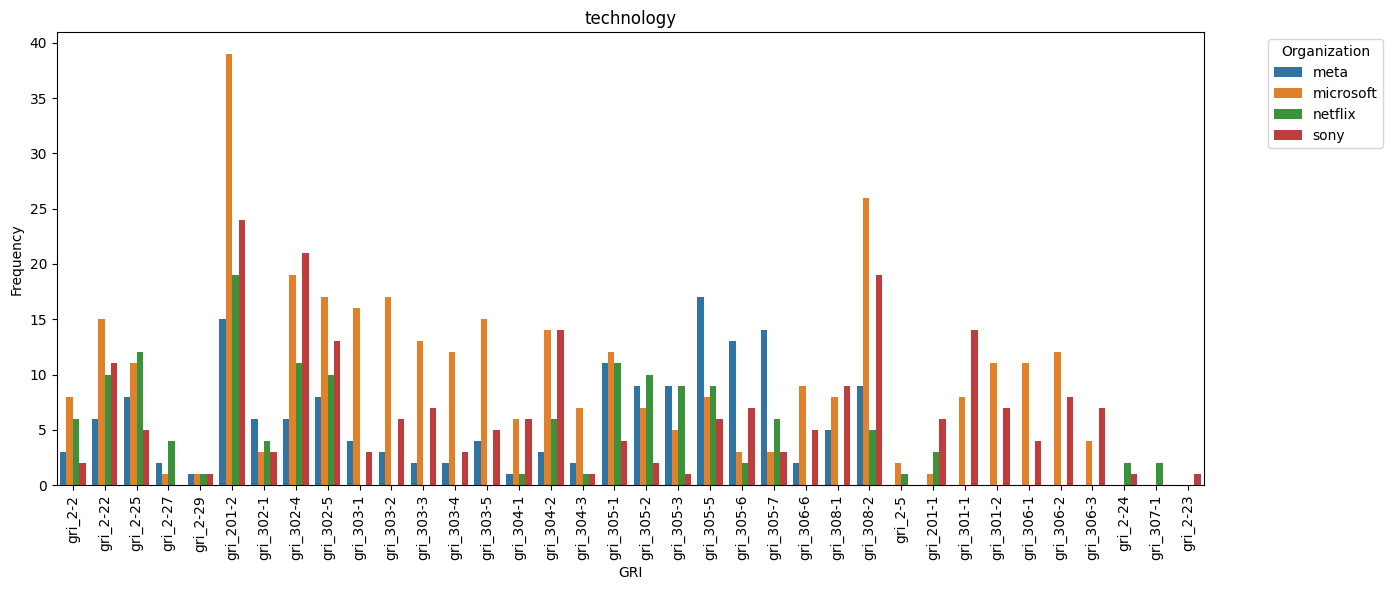

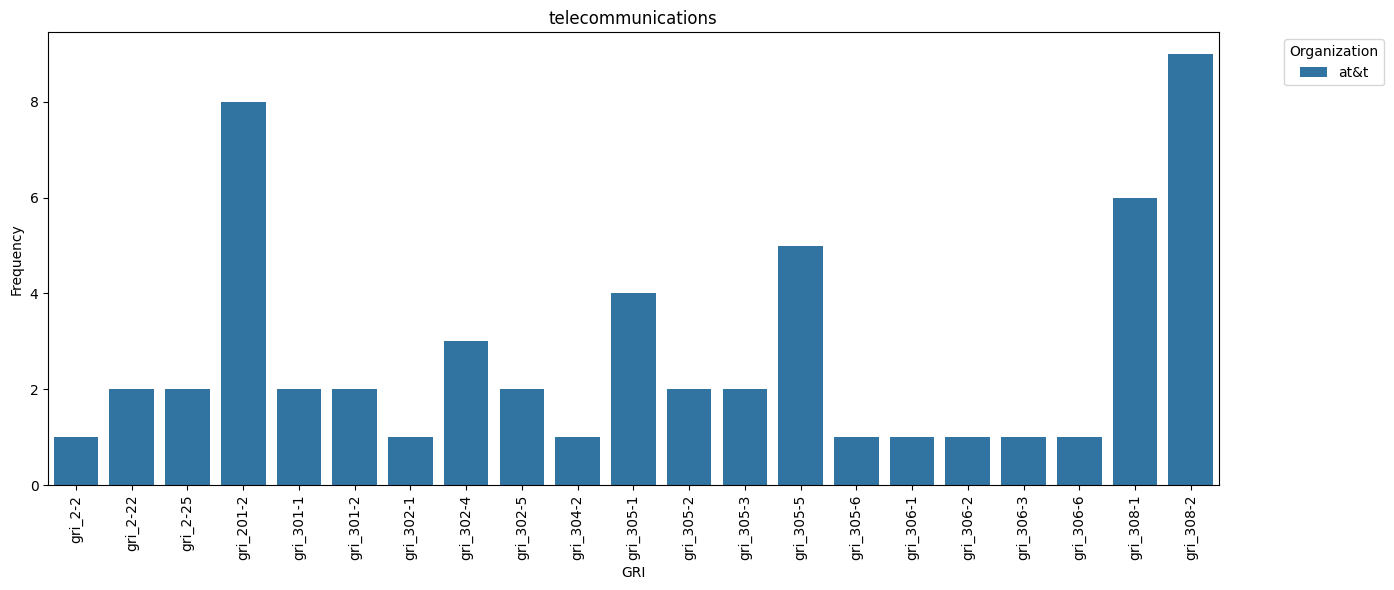

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sectors = gri_counts['industry'].unique()

for sector in sectors:
    plt.figure(figsize=(14, 6))
    subset = gri_counts[gri_counts['industry'] == sector]
    
    sns.barplot(
        data=subset,
        x='gri_idx', y='count', hue='organization'
    )
    
    plt.title(sector)
    plt.xticks(rotation=90)
    plt.xlabel("GRI")
    plt.ylabel("Frequency")
    plt.legend(title="Organization", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
for sector in sectors:
    plt.figure(figsize=(7, 5))
    subset = gri_counts[gri_counts['industry'] == sector]
    sns.boxplot(
        data=subset,
        x='gri_idx', y='count'
    )
    plt.xticks(rotation=90)
    plt.title(sector)
    plt.tight_layout()
    plt.show()

In [ ]:
for sector in sectors:
    plt.figure(figsize=(7, 5))
    subset = gri_counts[gri_counts['industry'] == sector]
    heat_data = subset.pivot_table(index='organization', columns='gri_idx', values='count', fill_value=0)
    sns.heatmap(heat_data, cmap="YlGnBu")
    plt.xticks(rotation=90)
    plt.title(sector)
    plt.tight_layout()
    plt.show()